# La Liga - Clutch Analysis - 2017/18 Season

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('laliga1718_goals.csv')

In [3]:
cols = df.columns
cols

Index(['Unnamed: 0', 'player', 'own_goal', 'minute', 'extra_minute',
       'fixture_id', 'team', 'opponent', 'updated_score', 'score_a', 'score_b',
       'tied', 'up_1', 'up_2', 'down_1', 'score_grade', 'time_weight',
       'player_clutch_score'],
      dtype='object')

## *Clutch Scores* -  Every Goal by Player

In [4]:
df_table = df.drop(columns=['Unnamed: 0', 'fixture_id', 'opponent', 'updated_score',
                            'score_a', 'score_b', 'score_grade', 'time_weight'], axis=1)
df_table.own_goal.replace({0: False, 1: True}, inplace=True)
df_table.extra_minute.fillna(False, inplace=True)
df_table.head(20)

,player,own_goal,minute,extra_minute,team,tied,up_1,up_2,down_1,player_clutch_score
0,José Luis Morales,False,88,False,Levante,False,True,False,False,4.400000
1,Willian José,False,88,False,Real Sociedad,False,True,False,False,4.400000
2,Juanmi,False,80,False,Real Sociedad,True,False,False,False,3.150000
3,Maxi Gómez,False,50,False,Celta de Vigo,False,True,False,False,1.538462
4,Mikel Oyarzabal,False,33,False,Real Sociedad,True,False,False,False,0.440000
5,Maxi Gómez,False,22,False,Celta de Vigo,False,True,False,False,0.488889
6,José Giménez,False,85,False,Atlético de Madrid,True,False,False,False,2.550000
7,Ángel Correa,False,78,False,Atlético de Madrid,False,False,False,True,0.682500
8,Christian Stuani,False,25,False,Girona,False,False,True,False,0.166667
9,Christian Stuani,False,22,False,Girona,False,True,False,False,0.488889


## *Top 10 Scorers* - Are They Clutch?

In [5]:
# List - SEASON's Top 10 scoring players 
top10_scorers_lst = df_table.player.value_counts().head(10).index

# Dataframe - Top 10 scorers 
top10_scorers = df_table[df_table.player.isin(top10_scorers_lst)]

# List - TOTAL Goal Count - Top 10 scoring players
top10_goalcount = top10_scorers.player.value_counts()

# Dataframe - Top 10 scorers AFTER 80TH MINUTE
top10_scorers80 = df_table[df_table.minute > 80][df_table[df_table.minute > 80].player.isin(top10_scorers_lst)]

# List - Goal Count - AFTER 80TH MINUTE Top 10 scoring players
top10_goalcount80 = top10_scorers80.player.value_counts()

# List - Avg 'clutch_score' - AFTER 80TH MINUTE Top 10 scoring players
top10_avgclutch80 = top10_scorers80.groupby('player')['player_clutch_score'].agg(np.mean)

In [69]:
df_top10 = pd.concat([top10_avgclutch80, top10_goalcount80, top10_goalcount], axis=1, sort=False).reset_index()
df_top10.columns = ['player', 'c_score_after_80th', 'goals_after_80min', 'total_goals']
df_top10 = df_top10.sort_values(by='c_score_after_80th', ascending=False).reset_index(drop=True)
df_top10

,player,c_score_after_80th,goals_after_80min,total_goals
0,Maxi Gómez,3.690000,1,18
1,Gerard Moreno,3.005000,3,16
2,Antoine Griezmann,2.402500,2,19
3,Cristiano Ronaldo,2.387000,5,26
4,Iago Aspas,2.300000,2,24
5,Lionel Messi,1.954375,8,34
6,Cristhian Stuani,1.267500,2,19
7,Luis Suárez,1.058750,4,25
8,Gareth Bale,0.430000,1,16
9,Rodrigo Moreno,0.430000,1,16


## *Top Clutch Scorers* (4+ Goals after 80th minute)

In [68]:
## Dataframe - AFTER 80TH MINUTE Clutch scorers with +4 Goals
clutch_table = df_table[df_table.minute > 80].groupby('player').filter(lambda x: len(x) >= 4).sort_values(['player'])

# List - Player Names - AFTER 80TH MINUTE Clutch scorers with +4 Goals
players_clutch = clutch_table.player.unique()

# List - TOTAL Goal Count - AFTER 80TH MINUTE Clutch scorers with +4 Goals
clutch_total_goalcnt = df_table[df_table.player.isin(players_clutch)].player.value_counts()

# List - Goal Count - AFTER 80TH MINUTE Clutch scorers with +4 Goals
clutch_goalcnt = clutch_table.player.value_counts()

# List - Avg 'clutch_score' - AFTER 80TH MINUTE Clutch scorers with +4 Goals
clutch_avg_score = clutch_table.groupby('player')['player_clutch_score'].agg(np.mean)

### Sorted by Average Clutch Score

In [8]:
df_clutch = pd.concat([clutch_avg_score, clutch_goalcnt, clutch_total_goalcnt], axis=1, sort=False).reset_index()
df_clutch.columns = ['player', 'c_score_after_80th', 'goals_after_80th', 'total_goals']
df_clutch = df_clutch.sort_values(by='c_score_after_80th', ascending=False).reset_index(drop=True)
df_clutch

,player,c_score_after_80th,goals_after_80th,total_goals
0,Daniel Parejo,2.626250,4,7
1,Cristiano Ronaldo,2.387000,5,26
2,Ángel Rodríguez,2.131000,5,13
3,Lionel Messi,1.954375,8,34
4,Paulinho,1.623750,4,9
5,Luis Suárez,1.058750,4,25


### Sorted by Most Goals after 80th minute

In [9]:
df_clutch_sorted = df_clutch.sort_values(by='goals_after_80th', ascending=False).reset_index(drop=True)
df_clutch_sorted

,player,c_score_after_80th,goals_after_80th,total_goals
0,Lionel Messi,1.954375,8,34
1,Cristiano Ronaldo,2.387000,5,26
2,Ángel Rodríguez,2.131000,5,13
3,Daniel Parejo,2.626250,4,7
4,Paulinho,1.623750,4,9
5,Luis Suárez,1.058750,4,25


### Most Ties & Wins Earned after 80th minute

In [73]:
# List -  TIED Count - AFTER 80TH MINUTE Clutch scorers with +4 Goals
clutch_tied_count = np.sum(clutch_table.groupby('player')['tied'])

# List -  UP_1 Count - AFTER 80TH MINUTE Clutch scorers with +4 Goals
clutch_up1_count = np.sum(clutch_table.groupby('player')['up_1'])

# List - POINTS Earned -AFTER 80TH MINUTE Clutch scorers with +4 Goals
clutch_points =  clutch_tied_count + (clutch_up1_count)*3

# DataFrame - Wins & Ties - AFTER 80TH MINUTE Clutch scorers with +4 Goals
df_clutch_wt = pd.concat([clutch_tied_count, clutch_up1_count, clutch_points], axis=1, sort=False).reset_index()
df_clutch_wt.columns = ['Player', 'Ties', 'Wins', 'Points Earned']
df_clutch_wt = df_clutch_wt.sort_values(by=['Points Earned'], ascending=False).reset_index(drop=True)
df_clutch_wt

,Player,Ties,Wins,Points Earned
0,Cristiano Ronaldo,1,2,7
1,Lionel Messi,1,2,7
2,Daniel Parejo,0,2,6
3,Ángel Rodríguez,2,1,5
4,Paulinho,0,1,3
5,Luis Suárez,1,0,1


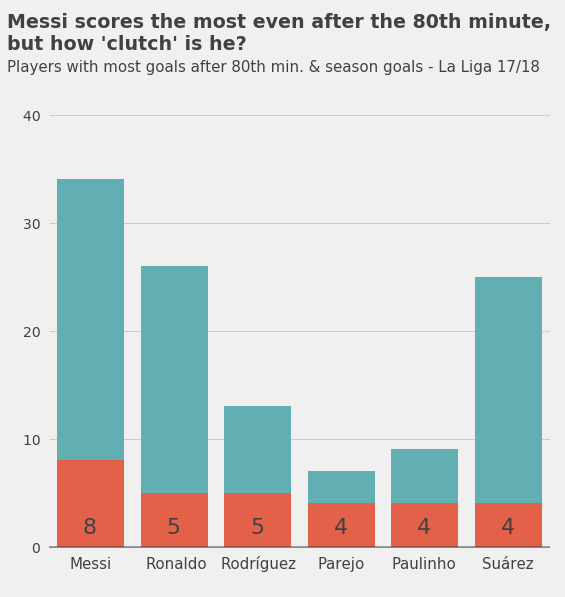

In [263]:
import matplotlib.style as style
style.use('fivethirtyeight')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot total goals
ax = sns.barplot(x="player", y="total_goals", data=df_clutch_sorted,
            label="Total Goals", color = '#53BBC1')

# Bolded horizontal line at y=0
ax.axhline(y=0, color='#414141', linewidth=1.9, alpha=.5)

# Y-labels to only these
ax.set_yticks([0, 10, 20, 30, 40])
ax.set_yticklabels(labels=['0 ', '10 ', '20 ', '30 ', '40 '], fontsize=14, color='#414141')
ax.set_yticks([0, 10, 20, 30, 40])
ax.set_xticklabels(['Messi', 'Ronaldo', 'A. Rodriguez', 'D. Parejo', 'Paulinho', 'Suarez'], fontsize=14, color='#414141')

# Plot Goals after 80
ax1 = sns.barplot(x="player", y="goals_after_80th", data=df_clutch_sorted,
            label="", color="#FC4F30")
ax1.set_xticklabels([""])

# Text comments on graph
ax.text(x=-0.25, y=-2, s="Messi", fontsize=15, color='#414141')
ax.text(x=0.65, y=-2, s="Ronaldo", fontsize=15, color='#414141')
ax.text(x=1.55, y=-2, s="Rodríguez", fontsize=15, color='#414141')
ax.text(x=2.71, y=-2, s="Parejo", fontsize=15, color='#414141')
ax.text(x=3.6, y=-2, s="Paulinho", fontsize=15, color='#414141')
ax.text(x=4.68, y=-2, s="Suárez", fontsize=15, color='#414141')

# Goals 80th
ax.text(x=-0.1, y=1.2, s="8", fontsize=22, color='#414141')
ax.text(x=0.91, y=1.2, s="5", fontsize=22, color='#414141')
ax.text(x=1.91, y=1.2, s="5", fontsize=22, color='#414141')
ax.text(x=2.91, y=1.2, s="4", fontsize=22, color='#414141')
ax.text(x=3.91, y=1.2, s="4", fontsize=22, color='#414141')
ax.text(x=4.91, y=1.2, s="4", fontsize=22, color='#414141')

# Title
ax.text(x=-1, y=46, s="Messi scores the most even after the 80th minute, \nbut how 'clutch' is he?", fontsize=19, fontweight='bold', color='#414141')
ax.text(x=-1, y=44, s="Players with most goals after 80th min. & season goals - La Liga 17/18", fontsize=15, color='#414141')

# spines and axis
ax.set(ylim=(-4, 50), ylabel="", xlabel="")
sns.despine(left=True, bottom=True)

## *Adjusted Average Clutch Score (AAC-Score)*
### (Adjusted to Grade Games' Last Goals that Win or Tie Game)

### *Players with Highest AAC Score* (5+ Goals to Win or Tie Game)

In [63]:
df_t2 = df.drop(columns=['Unnamed: 0', 'opponent', 'updated_score',
                            'score_a', 'score_b'], axis=1)
df_t2.own_goal.replace({0: False, 1: True}, inplace=True)
df_t2.extra_minute.fillna(False, inplace=True)

In [87]:
df_t2.head()

,player,own_goal,minute,extra_minute,fixture_id,team,tied,up_1,up_2,down_1,player_clutch_score
0,José Luis Morales,False,88,False,4193968,Levante,False,True,False,False,4.400000
1,Willian José,False,88,False,4193969,Real Sociedad,False,True,False,False,4.400000
2,Juanmi,False,80,False,4193969,Real Sociedad,True,False,False,False,3.150000
3,Maxi Gómez,False,50,False,4193969,Celta de Vigo,False,True,False,False,1.538462
4,Mikel Oyarzabal,False,33,False,4193969,Real Sociedad,True,False,False,False,0.440000


In [33]:
# Datafram with only Last Goals if those Tied or Broke Tie
df_wt = df_t2[(df_t2.tied == True) | (df_t2.up_1 == True)].drop_duplicates(subset=['fixture_id'])

In [60]:
# List - WINS & TIES Players with 5+ Goals
top_wt_lst = df_wt.player.value_counts().head(18).index

# List - WINS & TIES Goal count - Players with 5+ Goals
top_wt_goalcount =df_wt.player.value_counts().head(18)

# Dataframe - WINS & TIES Players with 5+ Goals
df_top_wt = df_wt[df_wt.player.isin(top_wt_lst)]

# List - ADJUSTED AVG CLUTCH SCORE 
top_aacs = (df_top_wt.groupby('player')['player_clutch_score'].mean())*1.25

In [70]:
# List -  TIED Count - WINS & TIES Players with 5+ Goals
top_aacs_tied_count = np.sum(df_top_wt.groupby('player')['tied'])

# List -  UP_1 Count - WINS & TIES Players with 5+ Goals
top_aacs_up1_count = np.sum(df_top_wt.groupby('player')['up_1'])

# List - POINTS Earned - WINS & TIES Players with 5+ Goals
top_aacs_points =  top_aacs_tied_count + (top_aacs_up1_count)*3

In [85]:
df_aacs_top = pd.concat([top_aacs, top_wt_goalcount, top_aacs_tied_count, top_aacs_up1_count, top_aacs_points], axis=1, sort=False).reset_index()
df_aacs_top.columns = ['Player', 'AACS', 'Goals Earning W/T', 'Ties Earned', 'Wins Earned', 'Points Earned']
df_aacs_top = df_aacs_top.sort_values('AACS', ascending=False).reset_index(drop=True)
df_aacs_top

,Player,AACS,Goals Earning W/T,Ties Earned,Wins Earned,Points Earned
0,Cristiano Ronaldo,3.065087,7,1,6,19
1,José Luis Morales,2.778825,5,2,3,11
2,Maxi Gómez,2.754565,5,3,2,9
3,Ángel Rodríguez,2.650294,8,3,5,18
4,Gerard Moreno,2.462862,9,2,7,23
5,Willian José,2.072049,6,0,6,18
6,Jonathan Calleri,1.985057,5,2,3,11
7,Antoine Griezmann,1.925702,7,1,6,19
8,Kevin Gameiro,1.913448,5,0,5,15
9,Loren Morón,1.904412,5,1,4,13


### *Teams with Highest AACS* (20+ Goals to Win or Tie Game)

In [65]:
# List - WINS & TIES Teams with 20+ Goals
top_teams_wt_lst = df_wt.team.value_counts().head(7).index

# List - WINS & TIES Goal count - Teams with 20+ Goals
top_teams_wt_goalcount = df_wt.team.value_counts().head(7)

# Dataframe - WINS & TIES Teams with 20+ Goals
df_top_teams_wt = df_wt[df_wt.team.isin(top_teams_wt_lst)]

# List - ADJUSTED AVG CLUTCH SCORE 
top_teams_aacs = (df_top_teams_wt.groupby('team')['player_clutch_score'].mean())*1.25

In [67]:
df_aacs_teams = pd.concat([top_teams_aacs, top_teams_wt_goalcount], axis=1, sort=False).reset_index()
df_aacs_teams.columns = ['team', 'adj_avg_clutch_score', 'total_win_tie_goals']
df_aacs_teams = df_aacs_teams.sort_values('adj_avg_clutch_score', ascending=False).reset_index(drop=True)
df_aacs_teams

,team,adj_avg_clutch_score,total_win_tie_goals
0,Levante,2.824284,20
1,Real Betis,2.728694,22
2,Villarreal,1.960083,20
3,Valencia,1.886482,22
4,Atlético de Madrid,1.862912,25
5,Barcelona,1.854197,30
6,Real Madrid,1.679725,24


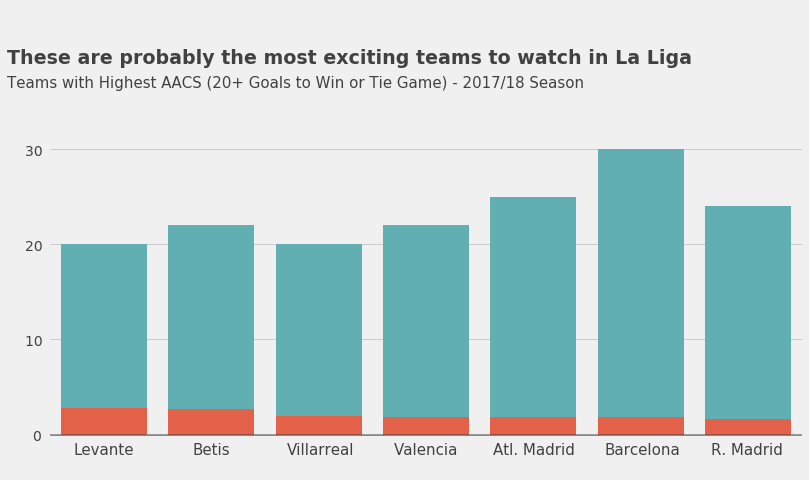

In [335]:
import matplotlib.style as style
style.use('fivethirtyeight')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Plot total goals
ax = sns.barplot(x="team", y="total_win_tie_goals", data=df_aacs_teams,
            label="Goals to Win or Tie Game", color = '#53BBC1')

# Bolded horizontal line at y=0
ax.axhline(y=0, color='#414141', linewidth=1.9, alpha=.5)

# Y-labels to only these
ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels(labels=['0 ', '10 ', '20 ', '30 '], fontsize=14, color='#414141')
ax.set_yticks([0, 10, 20, 30])

# Plot Goals after 80
ax1 = sns.barplot(x="team", y="adj_avg_clutch_score", data=df_aacs_teams,
            label="", color="#FC4F30")
ax1.set_xticklabels([""])

# Text comments on graph
ax.text(x=-.28, y=-2, s="Levante", fontsize=15, color='#414141')
ax.text(x=0.83, y=-2, s="Betis", fontsize=15, color='#414141')
ax.text(x=1.7, y=-2, s="Villarreal", fontsize=15, color='#414141')
ax.text(x=2.7, y=-2, s="Valencia", fontsize=15, color='#414141')
ax.text(x=3.62, y=-2, s="Atl. Madrid", fontsize=15, color='#414141')
ax.text(x=4.66, y=-2, s="Barcelona", fontsize=15, color='#414141')
ax.text(x=5.65, y=-2, s="R. Madrid", fontsize=15, color='#414141')

# Title
ax.text(x=-.9, y=39, s="These are probably the most exciting teams to watch in La Liga", fontsize=19, fontweight='bold', color='#414141')
ax.text(x=-.9, y=36.5, s="Teams with Highest AACS (20+ Goals to Win or Tie Game) - 2017/18 Season", fontsize=15, color='#414141')

# spines and axis
ax.set(ylim=(-4, 45), ylabel="", xlabel="")
sns.despine(left=True, bottom=True)